In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
#Reading Dataset Into Python
dataset = pd.read_csv('Dataset.csv')
dataset.shape

(48842, 15)

In [3]:
#Printing Head Of Dataset
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Checking Number Of Null Values
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [5]:
dataset.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'], dtype=object)

In [6]:
dataset['Income'].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: Income, dtype: int64

In [7]:
def classify_income(income):
    if('<' in income):
        return 0
    else:
        return 1

In [8]:
def plot_cm(cnf_mat,title):
    plt.clf()
    plt.imshow(cnf_mat, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['<=50K','>50K']
    plt.title(title)
    plt.ylabel('True Income')
    plt.xlabel('Predicted Income')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(cm[i][j]))
    plt.show()

In [9]:
def print_cm_res(cnf_mat):
    TN = cnf_mat[0][0]
    FP = cnf_mat[0][1]
    FN = cnf_mat[1][0]
    TP = cnf_mat[1][1]

    sens = TP/(TP+FN)
    prec = TP/(TP+FP)
    accu = (TP+TN)/(TN+FP+FN+TP)

    print("Sensitivity : ",round(sens,2))
    print("Precison : ",round(prec,2))
    print("Accuracy : ",round(accu,2))

In [10]:
dataset['Final_Income'] = dataset.Income.apply(classify_income)

In [11]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income,Final_Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [12]:
dataset['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [13]:
iv = dataset.iloc[:,0:14]
iv = pd.get_dummies(iv,drop_first=True)
dv = dataset['Final_Income']
iv.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size = 0.2,random_state = 0) 

In [15]:
iv_train.shape

(39073, 100)

In [16]:
dv_train.shape

(39073,)

In [17]:
iv_test.shape

(9769, 100)

In [18]:
iv_train.shape

(39073, 100)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(2,random_state = 0)
pca.fit(iv_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
iv_pca_train = pd.DataFrame(pca.transform(iv_train))
iv_pca_test = pd.DataFrame(pca.transform(iv_test))

In [21]:
iv_pca_train.head()

,0,1
0,-72016.041371,-1091.557422
1,168331.951457,-1033.852091
2,12853.955674,-1071.172242
3,114303.953013,-1046.818362
4,185529.951073,-1029.725121


In [22]:
from sklearn.linear_model import LogisticRegression
lgr1 = LogisticRegression(random_state = 0)
lgr2 = LogisticRegression(random_state = 0)
lgr1.fit(iv_pca_train,dv_train)
lgr2.fit(iv_train,dv_train)

C:\Users\sujay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sujay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

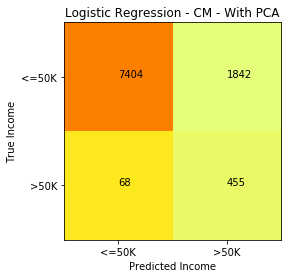

Sensitivity :  0.87
Precison :  0.2
Accuracy :  0.8


In [23]:
cm = confusion_matrix(dv_test,lgr1.predict(iv_pca_test))
cm = pd.DataFrame(cm)
plot_cm(cm,'Logistic Regression - CM - With PCA')
print_cm_res(cm)

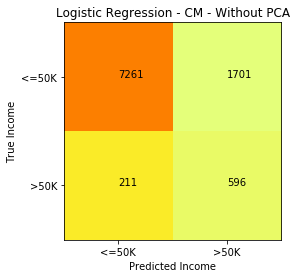

Sensitivity :  0.74
Precison :  0.26
Accuracy :  0.8


In [24]:
cm = confusion_matrix(dv_test,lgr2.predict(iv_test))
cm = pd.DataFrame(cm)
plot_cm(cm,'Logistic Regression - CM - Without PCA')
print_cm_res(cm)